### Importing Libraries

In [218]:
import pandas as pd
import numpy as np

In [219]:
car=pd.read_csv('quikr_data.csv')

In [220]:
car.head()

,company,name,year,Price,kms_driven,fuel_type
0,Hyundai,Hyundai Santro,2007,"80,000","45,000 kms",Petrol
1,Mahindra,Mahindra Jeep,2006,"4,25,000",40 kms,Diesel
2,Maruti,Maruti Suzuki Alto 800,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford,Ford EcoSport,2014,"5,75,000","36,000 kms",Diesel


In [221]:
car.shape

(888, 6)

In [222]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     888 non-null    object
 1   name        888 non-null    object
 2   year        888 non-null    object
 3   Price       888 non-null    object
 4   kms_driven  836 non-null    object
 5   fuel_type   833 non-null    object
dtypes: object(6)
memory usage: 41.8+ KB


##### Creating backup copy

In [223]:
backup=car.copy()

## Cleaning Data 

#### year has many non-year values

In [224]:
car=car[car['year'].str.isnumeric()]

#### Year is in object. Changed to integer

In [225]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price

In [226]:
car=car[car['Price']!='Ask For Price']

#### Price has commas in its prices and is in object

In [227]:
car['Price']=car['Price'].str.replace(',','').astype(int)

####  kms_driven has object values with kms at last.

In [228]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

#### It has nan values and two rows have 'Petrol' in them

In [229]:
car=car[car['kms_driven'].str.isnumeric()]

In [230]:
car['kms_driven']=car['kms_driven'].astype(int)

#### fuel_type has nan values

In [231]:
car=car[~car['fuel_type'].isna()]

In [232]:
car.shape

(812, 6)

### Name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [233]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [234]:
car=car.reset_index(drop=True)

## Cleaned Data

In [235]:
car

,company,name,year,Price,kms_driven,fuel_type
0,Hyundai,Hyundai Santro,2007,80000,45000,Petrol
1,Mahindra,Mahindra Jeep,2006,425000,40,Diesel
2,Hyundai,Hyundai Grand i10,2014,325000,28000,Petrol
3,Ford,Ford EcoSport,2014,575000,36000,Diesel
4,Ford,Ford Figo,2012,175000,41000,Diesel
...,...,...,...,...,...,...
807,Maruti,Maruti Suzuki Ritz,2011,270000,50000,Petrol
808,Tata,Tata Indica,2009,110000,30000,Diesel
809,Toyota,Toyota Corolla,2009,300000,132000,Petrol
810,Tata,Tata Zest,2018,260000,27000,Diesel


In [236]:
car.to_csv('Cleaned_Car_Data.csv')

In [237]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     812 non-null    object
 1   name        812 non-null    object
 2   year        812 non-null    int32 
 3   Price       812 non-null    int32 
 4   kms_driven  812 non-null    int32 
 5   fuel_type   812 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.7+ KB


In [238]:
car.describe(include='all')

,company,name,year,Price,kms_driven,fuel_type
count,812,812,812.000000,8.120000e+02,812.000000,812
unique,25,125,NaN,NaN,NaN,3
top,Maruti,Maruti Suzuki Swift,NaN,NaN,NaN,Petrol
freq,217,51,NaN,NaN,NaN,423
mean,NaN,NaN,2012.518473,4.257876e+05,46207.881773,NaN
std,NaN,NaN,3.900856,4.812730e+05,34354.086378,NaN
min,NaN,NaN,1995.000000,3.200000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,3.000000e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.982500e+05,56587.500000,NaN


In [239]:
car=car[car['kms_driven']<100000]

### Checking Relationship of Company with Price

In [240]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Tata', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Hindustan', 'Jeep', 'Volvo'],
      dtype=object)

In [241]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')

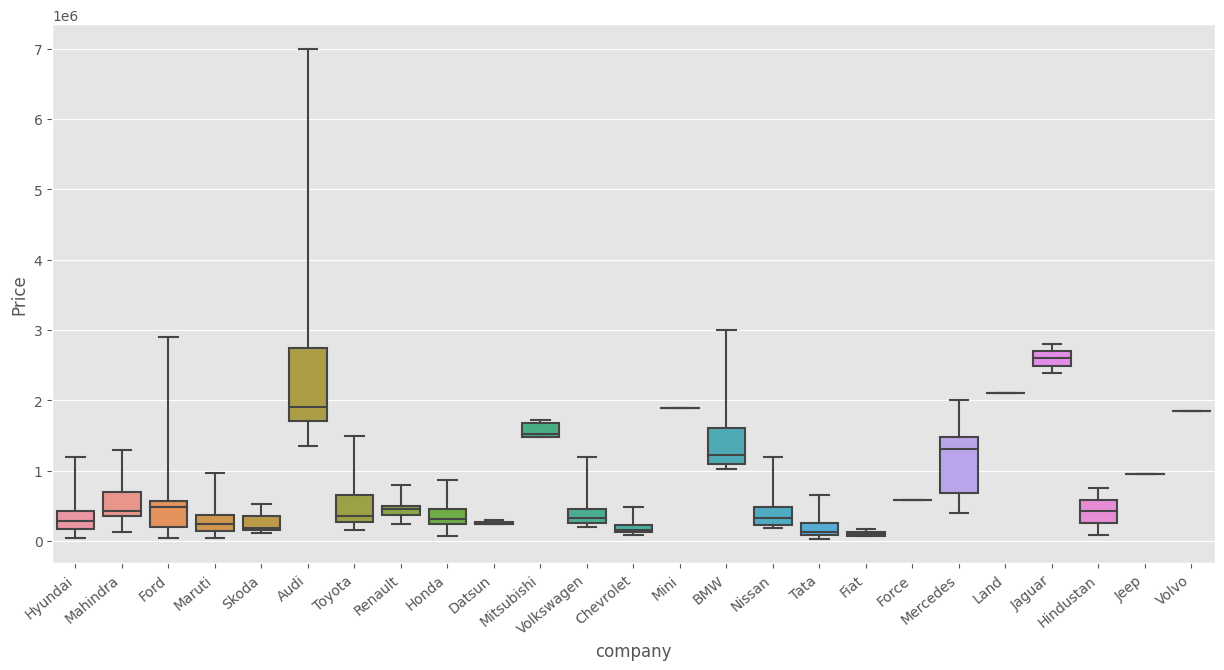

In [242]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car, whis=10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

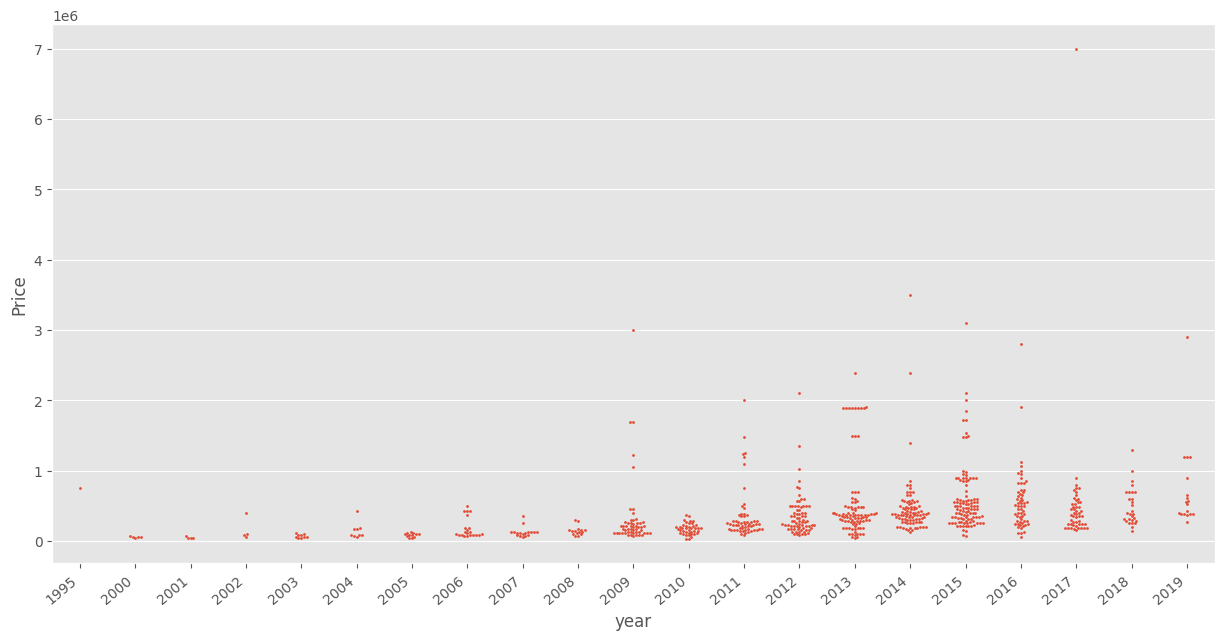

In [243]:
plt.subplots(figsize=(15,7))
ax=sns.swarmplot(x='year',y='Price',data=car,size=2)
xtick_positions = ax.get_xticks()
ax.set_xticks(xtick_positions)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

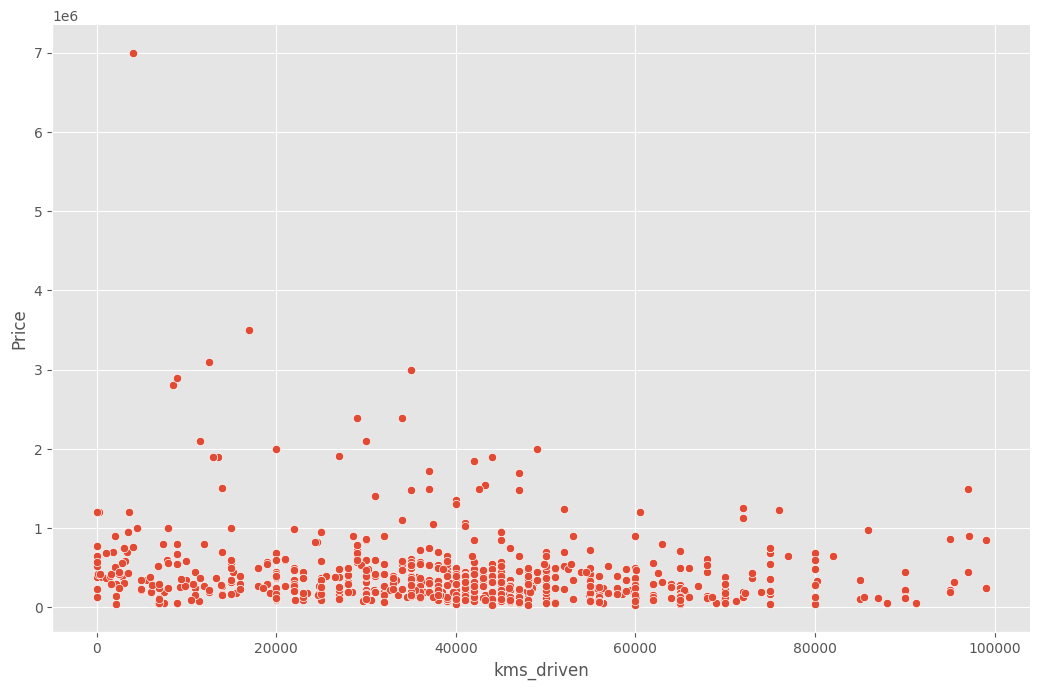

In [244]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

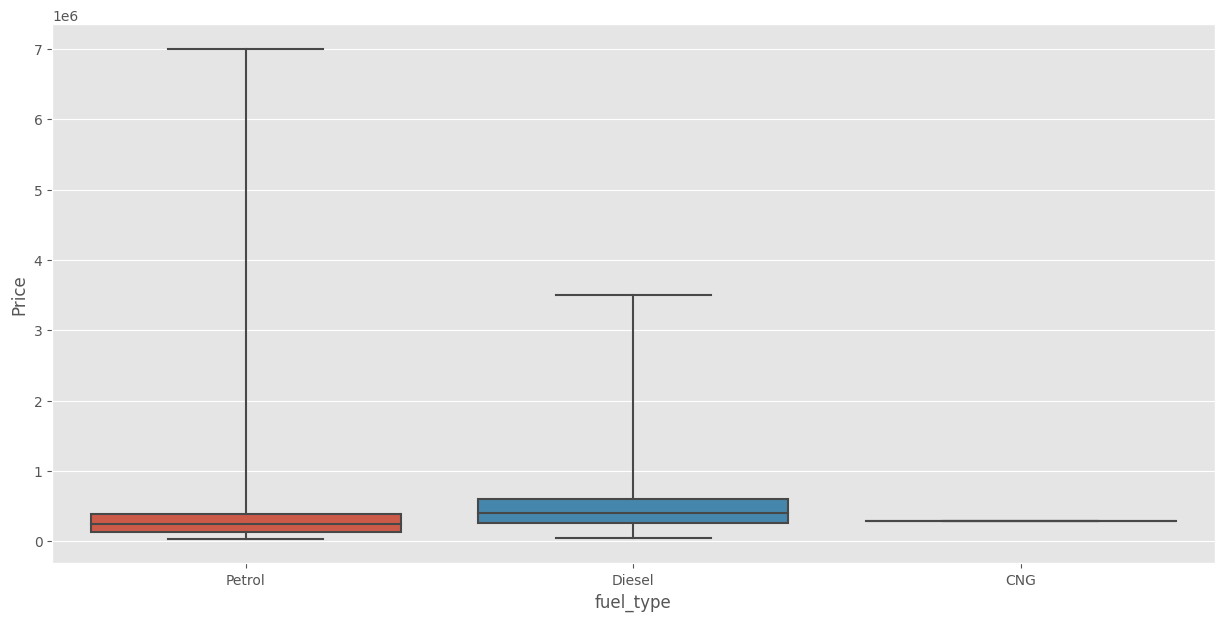

In [245]:
plt.subplots(figsize=(15,7))
sns.boxplot(x='fuel_type',y='Price',data=car, whis=30)

### Relationship of Price with FuelType, Year and Company mixed

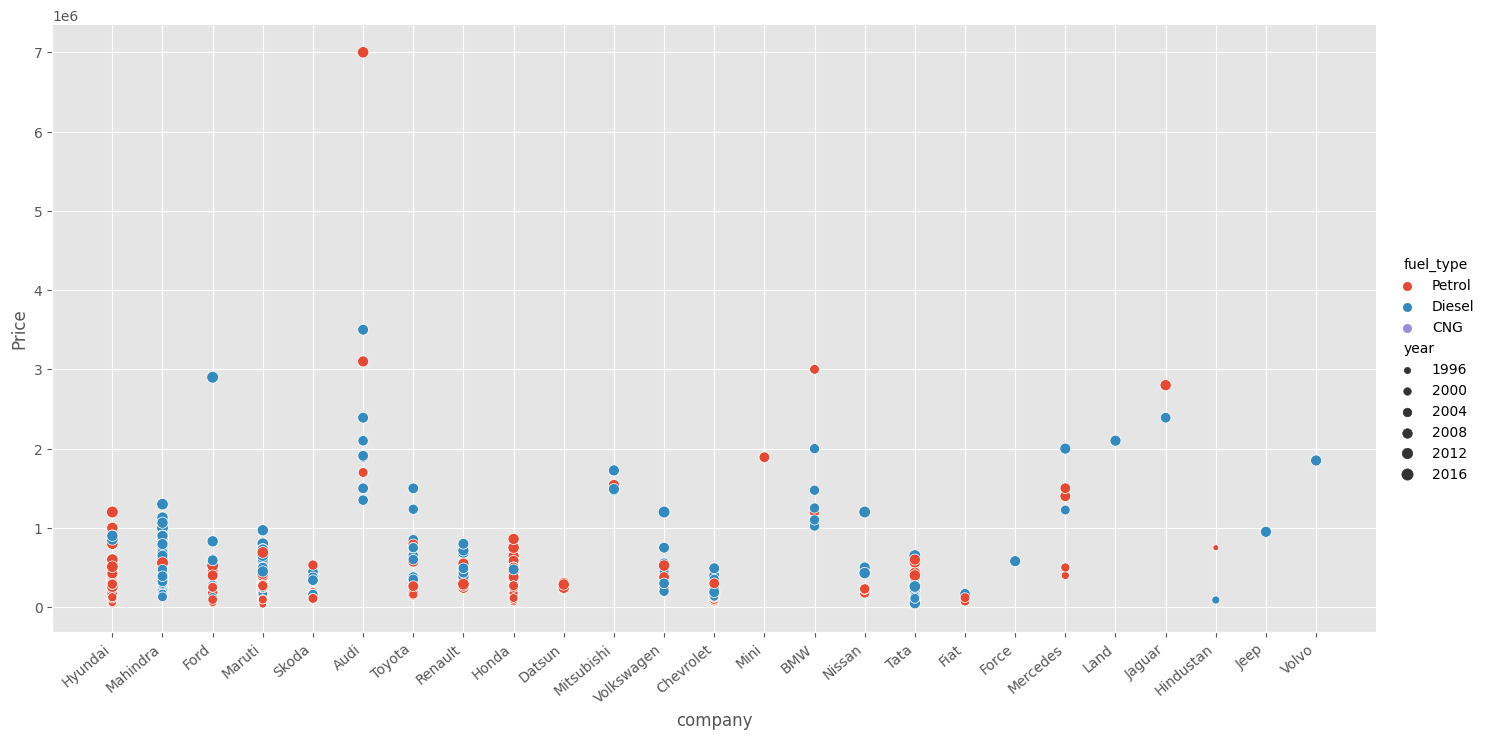

In [246]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [247]:
X=car[['name','year','kms_driven','fuel_type']]
y=car['Price']

In [248]:
X

,name,year,kms_driven,fuel_type
0,Hyundai Santro,2007,45000,Petrol
1,Mahindra Jeep,2006,40,Diesel
2,Hyundai Grand i10,2014,28000,Petrol
3,Ford EcoSport,2014,36000,Diesel
4,Ford Figo,2012,41000,Diesel
...,...,...,...,...
806,Skoda Fabia,2009,45000,Petrol
807,Maruti Suzuki Ritz,2011,50000,Petrol
808,Tata Indica,2009,30000,Diesel
810,Tata Zest,2018,27000,Diesel


In [249]:
y.shape

(760,)

### Applying Train Test Split

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [251]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#### Creating an OneHotEncoder object to contain all the possible categories

In [252]:
ohe=OneHotEncoder()
ohe.fit(X[['name','fuel_type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [253]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel_type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [254]:
lr=LinearRegression()

#### Making a pipeline

In [255]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [256]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3', 'Audi A4', 'Audi A6', 'Audi A8', 'Audi Q3', 'Audi Q5',
       'Audi Q7', 'BMW 3 Series', 'BMW 5 Series', 'BMW 7 Series',
       'BMW X1', 'Chevrolet Beat', 'Chevrolet Cruze', 'Chevrolet Enjoy',
       'Chevrolet Sail', 'Chevrolet Spark', 'Chevrolet Tave...
       'Tata Manza', 'Tata Nano', 'Tata Sumo', 'Tata Tiago', 'Tata Tigor',
       'Tata Venture', 'Tata Vista', 'Tata Zest', 'Toyota Corolla',
       'Toyota Etios', 'Toyota Fortuner', 'Toyota Innova',
       'Volkswagen Jetta', 'Volkswagen Passat', 'Volkswagen Polo',
       'Volkswagen Vento', 'Volvo S80'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Petrol'], dtype=object)]),
                                                  ['name', 'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [257]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [258]:
r2_score(y_test,y_pred)

0.28185674092067303

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.35-0.92 r2_score

In [259]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [260]:
np.argmax(scores)

904

In [261]:
scores[np.argmax(scores)]

0.7863524537807814

In [262]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift',2019,100,'Petrol']).reshape(1,4)))

array([642871.48143054])

#### The best model is found at a certain random state 

In [263]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7863524537807814

In [264]:
import pickle

In [265]:
pickle.dump(pipe,open('LinearRegression.pkl','wb'))

In [266]:
pipe.predict(pd.DataFrame(columns=['name','year','kms_driven','fuel_type'],data=np.array(['BMW X1',2019,25000,'Diesel']).reshape(1,4)))

array([1674759.21316101])